In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json

MODEL_WEIGHT_FILE = 'vgg.h5'
MODEL_JSON_FILE = 'vgg.json'
IMAGE_SIZE = (224, 224)
INPUT_SHAPE = (224, 224, 3)
MEAN = [123.68, 116.779, 103.939]
BATCH_SIZE = 1
TEST_DATA = 'data/test'
TEST_SIZE = 32
CLASS_MODE = 'binary'

Using TensorFlow backend.


In [2]:
# Load test Data
test_data_generator = ImageDataGenerator(featurewise_center=True)
test_data_generator.mean = MEAN

test_generator = test_data_generator.flow_from_directory(
    TEST_DATA,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE, 
    shuffle=False
)
test_generator.reset()

Found 12500 images belonging to 1 classes.


In [3]:
# Load Model
with open(MODEL_JSON_FILE,'r') as f:
    model = model_from_json(f.read())
model.load_weights(MODEL_WEIGHT_FILE)

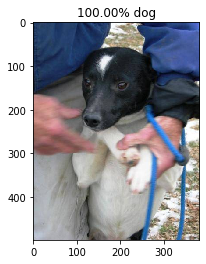

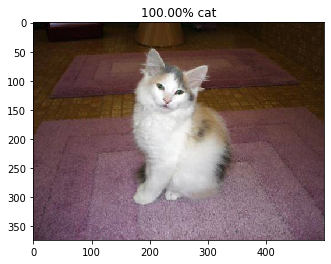

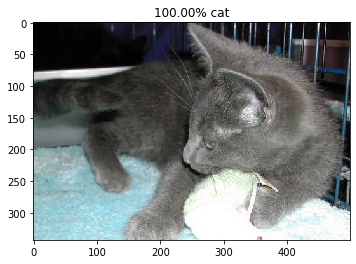

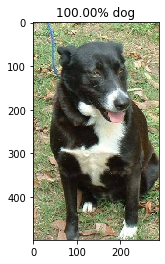

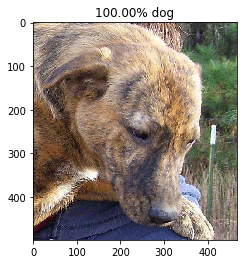

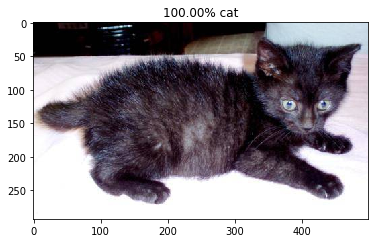

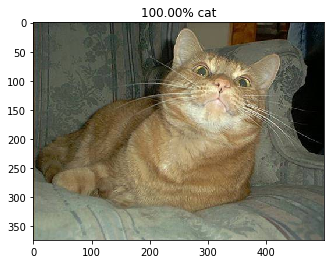

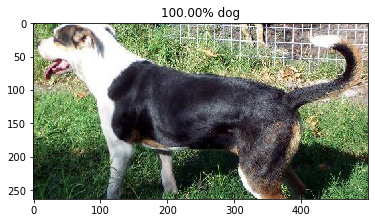

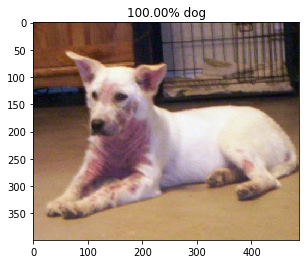

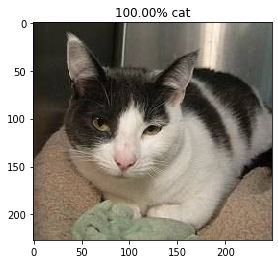

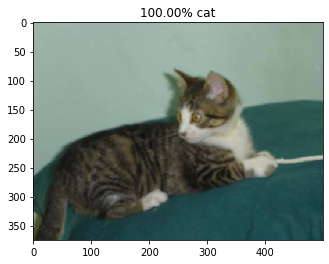

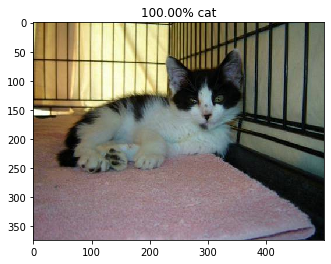

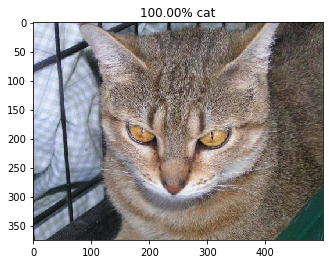

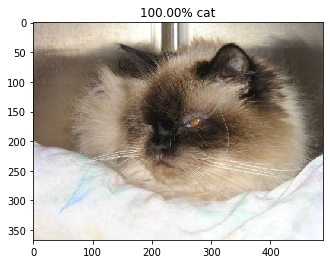

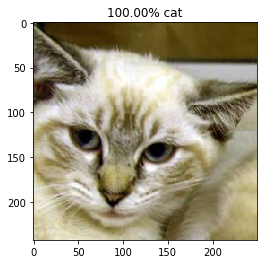

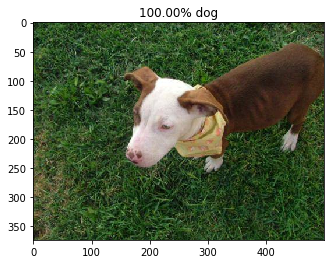

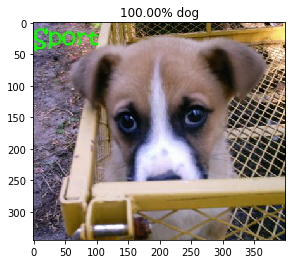

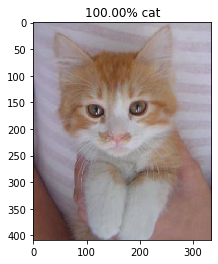

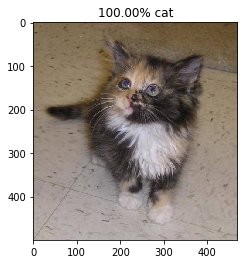

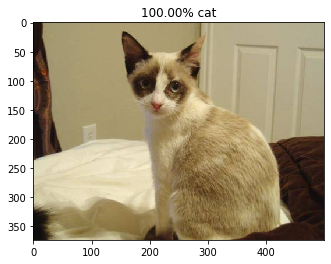

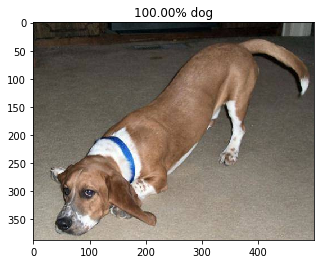

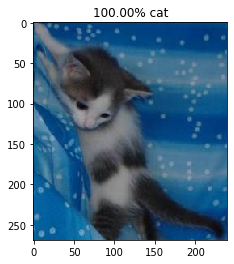

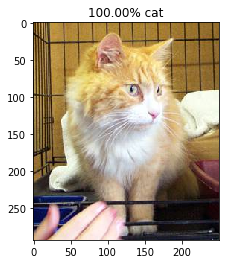

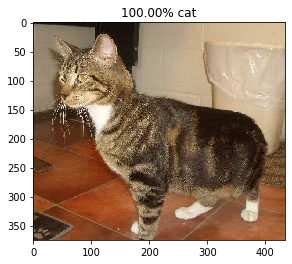

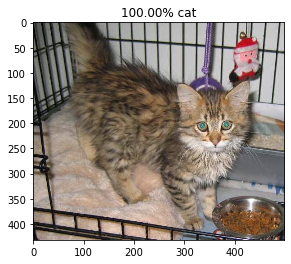

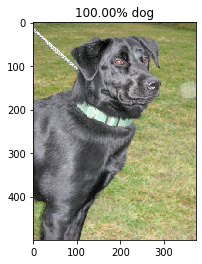

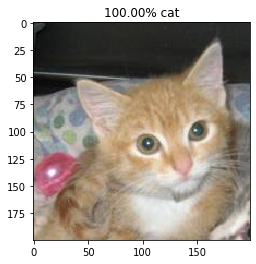

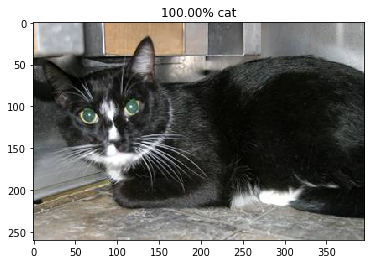

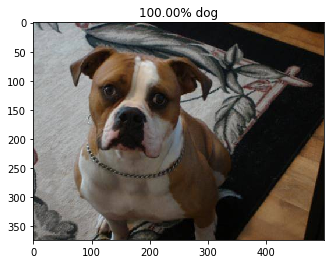

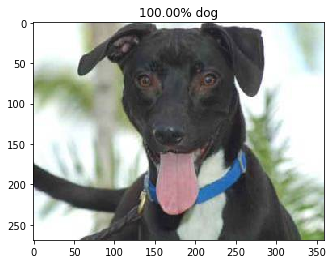

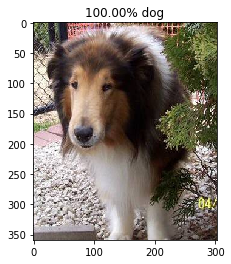

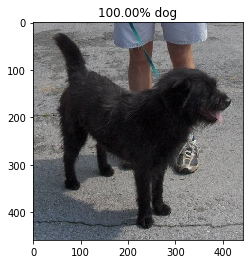

In [4]:
# Testing
for i, prob in enumerate(model.predict_generator(test_generator, TEST_SIZE)):
    plt.imshow(mpimg.imread(f'{TEST_DATA}/{test_generator.filenames[i]}'))
    if prob > 0.5:
        plt.title("%.2f" % (prob*100) + "% dog")
    else:
        plt.title("%.2f" % ((1-prob)*100) + "% cat")
    plt.show()